<a href="https://colab.research.google.com/github/Poimorph/TSP_complexity_IT4A_A25/blob/main/Projet_Complexit%C3%A9_A2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projet complexité

Réalisé par : Suhayb SALEH & Alba Laetitia DJADOU


## 1. Introduction

### 1.1 Points mathématique

La complexité d'un programme s'inspire principalement de ce qui s'appelle en termes mathématiques l'**analyse asymptotique**. L'analyse asymptotique est le domaine mathématique qui étudie relativement la convergence entre fonctions : sont-elles équivalents? L'une domine-t-elle l'autre?



#### 1.1.1 Vocabulaire et définitions

En mathématiques, l'analyse asymptotique se base principalement sur des **limites de fonctions**. On considère une variable $\alpha$ deux fonctions à valeur dans $\mathbb{R}$, $f(x)$ et $g(x)$, sachant que $g$ ne vaut pas 0 autour de $\alpha$.

On dépeint trois sortes de comportements en analyse asymptotique :

 - si $\lim\limits_{x \rightarrow \alpha} \frac{f(x)}{g(x)} = 1$, on dit que **$f$ est équivalent à $g$ en $\alpha$** et on le note $f \underset{x \rightarrow \alpha}{\sim} g$.
 - si $\exists C\in \mathbb{R}, \lim\limits_{x \rightarrow \alpha} \frac{f(x)}{g(x)} = C$, c'est-à-dire que $\frac{f(x)}{g(x)}$ tend vers une constante (nulle ou non), on dit que **$g$ domine $f$ en $\alpha$** et on le note $f(x)=\underset{x \rightarrow \alpha}{O}(g(x))$. En particulier, lorsque $f \underset{x \rightarrow \alpha}{\sim} g$, $g$ domine $f$ et $f$ domine $g$ en $\alpha$.
 - si  $\lim\limits_{x \rightarrow \alpha} \frac{f(x)}{g(x)} = 0$, alors on dit que **$f$ est négligeable en $\alpha$ devant $g$** et on le note $f(x)=\underset{x \rightarrow \alpha}{o}(g(x))$.

#### 1.1.2 Exemples

Soit $f$ et $g$ deux fonctions définies comme suit :

$$
\begin{align*}
f
\colon
\begin{cases}
\mathbf{\mathbb{R}} & \longrightarrow\mathbb{R}\\
x&\longmapsto \frac{1}{x^2}
\end{cases}
\end{align*}
$$
$$
\begin{align*}
g\colon
\begin{cases}
\mathbf{\mathbb{R}} & \longrightarrow\mathbb{R}\\
x&\longmapsto \frac{1}{x}
\end{cases}
\end{align*}
$$

On a :
$$
\frac{f(x)}{g(x)} = \frac{\frac{1}{x^2}}{\frac{1}{x}} = \frac{x}{x^2} = \frac{1}{x} \underset{x \rightarrow +\infty}{\longrightarrow}0
$$
et donc $f = \underset{x \rightarrow +\infty}{o}(g(x))$.

À l'inverse,

$$
\frac{g(x)}{f(x)} = \frac{\frac{1}{x}}{\frac{1}{x^2}} = \frac{x^2}{x} = {x} \underset{x \rightarrow 0}{\longrightarrow}0
$$
et donc $g = \underset{x \rightarrow 0}{o}(f(x))$.

On remarquera d'ailleurs que ni $f$, ni $g$, ne sont définies ni en $0$, ni en $+\infty$, ce qui fait la force de l'analyse asymptotique.

Un dernier exemple est celui de la suite $u_n=n!$. D'après la formule de Stirling, on a :
$$n! \sim \sqrt{2 \pi n} (\frac{n}{e})^n$$

#### 1.1.3 Remarques et propriétés importantes

Il est important de noter les points suivants :

 - Si $f(x)=\underset{x \rightarrow \alpha}{O}(g(x))$ et que $\lim\limits_{x \rightarrow \alpha} \frac{f(x)}{g(x)} \ne 0$, alors $g(x)=\underset{x \rightarrow \alpha}{O}(f(x))$ ; il suffit d'inverser $f$ et $g$ pour vérifier cette propriété.

 - Si $f(x) \sim g(x)$, alors $g(x) \sim f(x)$ ; il s'agit d'un cas particulier de la propriété précédente.

 - Si $f = \underset{x \rightarrow \alpha}{o}(g(x))$, alors $f = \underset{x \rightarrow \alpha}{O}(g(x))$ ; il s'agit du cas où $C = 0$.

 - Si $f = \underset{x \rightarrow \alpha}{O}(g(x))$ et $g = \underset{x \rightarrow \alpha}{O}(h(x))$, alors $f = \underset{x \rightarrow \alpha}{O}(h(x))$ ; de même, si $f = \underset{x \rightarrow \alpha}{o}(g(x))$ et $g = \underset{x \rightarrow \alpha}{o}(h(x))$, alors $f = \underset{x \rightarrow \alpha}{o}(h(x))$.


### 1.2. Application à l'informatique

#### 1.2.1. Lien entre informatique et mathématique

En informatique, on ne travaille non plus avec des fonctions réelles, mais des fonctions discrètes, c'est-à-dire des suites. Elles ont pour particularité de ne pas être continues.

Considérons par exemple le programme python suivant, destiné à calculer une multiplication par des opérations simples (la syntaxe est celle de python3.7+, supportant les [type hints](https://docs.python.org/3/library/typing.html)):
```python
def multiplicate(x: int, y: int) -> int:
    """
    Cette fonction multiplie a et b en utilisant l'algorithme de multiplication
    à la russe (voir TD0, exercice 5).
    """
    r = 0
    while x != 0:
        if x%2 == 1:
            r += y
            x -= 1
        x /= 2
        y *= 2
    return r
```

On remarque l'instruction *while*, dans laquelle les 3 variables `x`, `y` et `r` sont modifiées.

On peut donc les renommer, non plus `x`, `y` et `r`, mais plus mathématiquement $x_n$, $y_n$, $r_n$. On a donc $x_0=x$, $y_0=y$, $r_0=0$.

Ensuite, les éléments suivants de la suite sont définis récursivement :

$$
\forall n \in \mathbb{N},
x_{n+1} =
\begin{cases}
\frac{x_n - 1}{2} & \text{si } x_n \text{ est impair} \\
\frac{x_n}{2} & \text{sinon}
\end{cases}
$$

$$
\forall n \in \mathbb{N},
y_{n+1} = y_n*2
$$

$$
\forall n \in \mathbb{N},
r_{n+1} =
\begin{cases}
r_n + y_n & \text{si } x_n \text{ est impair} \\
r_n & \text{sinon}
\end{cases}
$$

On remarquera par ailleurs l'*invariant de boucle* permettant de garantir la bonne fonctionnalité du programme, à savoir que :

$$
\forall n \in \mathbb{N}, x_n y_n + r_n = x y
$$

En particulier, à la fin de la boucle, on sait que $x_n=0$, donc $x_n y_n + r_n = x y \Leftrightarrow r_n = x y$, et donc la variable `r` contient bien le résultat de `x` multiplié par `y` une fois sorti de la boucle.

#### 1.2.2 Utilisation de l'analyse asymptotique

Là où l'analyse asymptotique d'une fonction entre en jeu, c'est lorsque l'on souhaite connaître le comportement d'une fonction, en fonction des données entrées en argument. C'est surtout le cas lorsqu'on utilise des boucles, qui sont succeptibles de devoir être exécutées plus longtemps lorsqu'on se rapproche du *pire des cas*, c'est-à-dire lorsque les données entrés en argument sont particulièrement longues à traiter pour obtenir le résultat souhaité ou terminer la procédure.

Observons à nouveau le programme utilisé précédemment (la fonction multiplicate).

```python
def multiplicate(x: int, y: int) -> int:
    """
    Cette fonction multiplie a et b en utilisant
    l'algorithme de multiplication à la russe (voir TD0, exercice 5).
    """
    r = 0
    while x != 0:
        if x%2 == 1:
            r += y
            x -= 1
        x /= 2
        y *= 2
    return r
```

On remarque tout particulièrement qu'à chaque itération, `x` est divisé par 2, et éventuellement décrémenté lorsqu'il est impair. Puisque toutes les puissances de 2 sont paires, on peut prouver la propriété qui suit :

$$
\forall x \in \mathbb{N}, c(x)=\lfloor log2(x) \rfloor
$$

où $c(x)$ désigne le nombre d'itérations de la boucle en fonction de $x$, et $log2$ le logarithme en base 2 ($log2(x) = \frac{ln(x)}{ln(2)}$).

Le coefficient $c$ s'apparente à la *complexité* du programme, c'est-à-dire qu'on peut déterminer le comportement de la fonction à partir de $c$.

Comme $c$ se décline selon un nombre d'itérations (donc d'opérations), il est proportionnel au temps pris pour exécuter la fonction, que l'on nomme $C$ (en majuscule). $C$ est appelé *complexité en temps*. Il existe aussi une *complexité en mémoire*, consistant à considérer la quantité utilisée en mémoire dans un programme (par exemple récursif ou traitant des listes chaînées).

Puisqu'on ne connaît pas le temps pris par une opération du programme, on ne note donc pas : $C(x) = \lfloor log2(x) \rfloor$ mais :

$$
C(x) = O(log2(x))
$$

ou tout simplement, puisque $log2$ et $ln$ sont proportionnelles entre elles :

$$
C(x) = O(ln(x))
$$

Ce coefficient $C(x)$ nous permet de plus de comparer plusieurs programmes entre eux, et de déterminer quel fonction est plus avantageuse à utiliser.

Observons par exemple la fonction de multiplication définie en python ci-dessous :
```python
def multiplicate_naively(x: int, y: int) -> int:
    """
    Cette fonction multiplie a et b de manière naïve.
    """
    r = 0
    while x != 0:
        r += y
        x -= 1
    return r
```

En bref, la fonction `multiplicate_naively` multiplie `x` par `y` en additionnant `y`, `x` fois. Sa complexité est donc :
$$
C_2(x) = O(x)
$$

En comparant les deux fonctions, on observe aisément que :
$$
C(x) = o(C_2(x))
$$

Donc la complexité de la méthode russe est clairement plus intéressante que la méthode naïve, puisque c'est elle qui grandira le moins vite lorsque la variable `x` augmentera.

On dit que la complexité temporelle de `multiplicate` est logarithmique, et que celle de `multiplicate_naively` est linéaire.

## 2. La théorie de la complexité

La complexité est une branche des mathématiques, plus particulièrement de l'informatique théorique,
qui analyse de manière formelle le temps de calcul, la mémoire utilisée (et parfois d'autres ressources
comme la taille des circuits, le nombre de processeurs ou l'énergie consommée) nécessaires à un algorithme
pour résoudre un problème. Elle consiste à évaluer la difficulté intrinsèque des problèmes,
à les classer selon leur complexité, et à examiner les relations entre ces différentes classes.



## 3 Génération d'une instance de TSP

La génération des points se fait dans le carré $[0,1]^2$.

#### L'instance TSP générée est **métrique**, c’est-à-dire qu’elle respecte les trois règles suivantes :

Soit $V$ un ensemble de villes et $d$ une fonction de distance
$$V=\{1,2,…,n\}$$
$$d:V\times V\rightarrow \;\mathbb\;{R^+}$$

- **Symétrie** :
$$
\forall \;i,\;j\; \in\, V,\; d(i,j) \;=\; d(j,i)
$$

> La distance entre deux villes est la même dans les deux sens.

- **Positivité (et réflexivité)** :
$$
\forall\; i,\;j\; \in V,\; d(i,j)\;\geq\; 0,\;d(i,i)\; =\; 0
$$

> Les distances sont toujours positives, et la distance d’une ville à elle-même est nulle.

- **Inégalité triangulaire** :
$$
\forall i,\;j,\;k\;\in V,\; d(i,k) \leq d(i,j)\;+\;d(j,k)
$$

> Le chemin direct entre deux villes n’est jamais plus long que de passer par une ville intermédiaire.


In [ ]:
# IMPORTATION DE TOUTES LES BIBLIOTHEQUES

import numpy as np
import itertools
import random
import time
import math
import matplotlib.pyplot as plt
import networkx as nx
from typing import List, Tuple, Optional

In [ ]:
def generate_tsp_instance(n, seed=None):
    """
    Génère une instance TSP aléatoire de taille n.
    Args:
        n: nombre de villes
        seed: seed pour la reproductibilité
    Returns:
        Matrice de distance n x n
    """
    if seed is not None:
        np.random.seed(seed)

    # Génération de coordonnées aléatoires
    coords = np.random.rand(n, 2)

    # Calcul de la matrice de distance euclidienne
    dist_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if i != j:
                dist_matrix[i, j] = np.linalg.norm(coords[i] - coords[j])

    return dist_matrix, coords

In [ ]:
# Génère une instance avec 10 villes
distances, coordinates = generate_tsp_instance(5, seed=42)
distances

array([[0.        , 0.5017136 , 0.82421549, 0.32755369, 0.33198071],
       [0.5017136 , 0.        , 0.72642889, 0.72506609, 0.17058938],
       [0.82421549, 0.72642889, 0.        , 0.71690251, 0.7091551 ],
       [0.32755369, 0.72506609, 0.71690251, 0.        , 0.56557921],
       [0.33198071, 0.17058938, 0.7091551 , 0.56557921, 0.        ]])

## 3.5 Fonctions Utilitaires

In [ ]:
def tour_length(D: np.ndarray, tour: List[int]) -> float:
    """
    Calcule la longueur d'un chemin.
    Args:
        D : matrice des distance n x n.
        tour : permutation des villes (indices).
    Returns:
        longueur totale du circuit (fermé).
    """
    idx = np.asarray(tour)
    return float(D[idx, np.roll(idx, -1)].sum())

# Construction du graphe
def draw_graph(adj, title="Graphe complet", path=None, draw_label:bool =True):
    n = len(adj)
    G = nx.Graph()
    for i in range(n):
        for j in range(i+1, n):
            G.add_edge(i+1, j+1, weight=adj[i][j])

    pos = nx.circular_layout(G)

    nx.draw(G, pos, with_labels=True, node_color='brown', node_size=800, font_size=10)

    if path:
        edges = [(path[i]+1, path[i+1]+1) for i in range(len(path)-1)]
        nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color='red', width=3, alpha=0.8)

    if draw_label:
        edge_labels = {edge: f"{w:.2f}" for edge, w in nx.get_edge_attributes(G, 'weight').items()}
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='black', label_pos=0.55)

    plt.title(title)
    plt.show()


## 4. Résolution du TSP par Force Brute

### 4.1 Principe de l'algorithme

L'algorithme de force brute teste **toutes les permutations possibles** des villes pour trouver la solution optimale du problème du voyageur de commerce (TSP).

**Fonctionnement :**
- Génère toutes les permutations possibles de visites des villes
- Pour chaque permutation, calcule la distance totale du cycle Hamiltonien
- Conserve la meilleure solution trouvée

**Complexité :** O(n!) - factorial, donc **seulement praticable pour n ≤ 10**

### 4.2 Utilisation du code

```python
# Générer une instance
distances, coords = generate_tsp_instance(5, seed=42)
# Résoudre par force brute
distance_opt, chemin_opt = tsp_brute_force(distances)

print(f"Distance optimale: {distance_opt:.2f}")
print(f"Chemin: {chemin_opt}")
```

**Note :** Pour n=10, il y a 3 628 800 permutations à tester. Pour n=15 : 1,3 trillion.

In [ ]:
def tsp_brute_force(dist_matrix):
    """
    Résout le TSP par force brute.
    Args:
        dist_matrix: matrice de distance n x n
    Returns:
        (meilleure_distance, meilleur_chemin)
    """
    n = len(dist_matrix)
    villes = list(range(n))

    meilleure_distance = float('inf')
    meilleur_chemin = None

    # Teste toutes les permutations possibles
    for perm in itertools.permutations(villes[1:]):
        chemin = [0] + list(perm) + [0]  # Commence et termine à la ville 0
        distance = 0

        # Calcule la distance totale du chemin
        for i in range(len(chemin) - 1):
            distance += dist_matrix[chemin[i]][chemin[i + 1]]

        # Met à jour si meilleure solution trouvée
        if distance < meilleure_distance:
            meilleure_distance = distance
            meilleur_chemin = chemin[:-1]  # Enlève le dernier 0

    return meilleure_distance, meilleur_chemin

Distance optimale: 2.7622
Chemin optimal: [0, 4, 1, 6, 2, 3, 5]


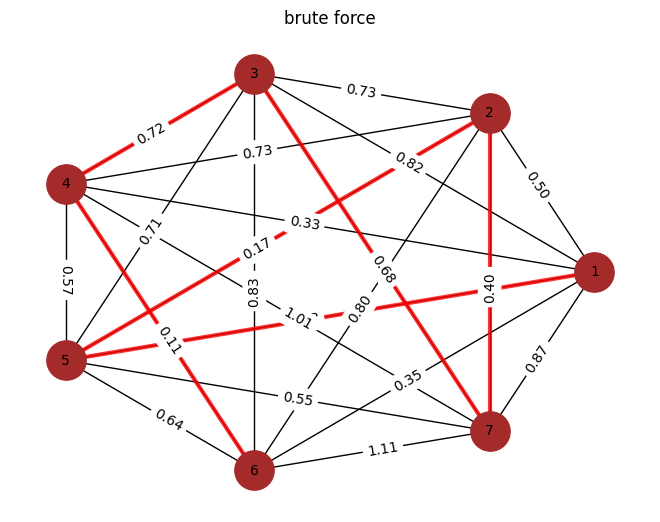

In [ ]:
distances, _ = generate_tsp_instance(5, seed=42)
distance, chemin = tsp_brute_force(distances)
print(f"Distance optimale: {distance:.4f}")
print(f"Chemin optimal: {chemin}")
draw_graph(distances, "brute force",chemin)

### 4.3 Calcul de complexité

#### 4.3.1 **Énumération de tous les cycles hamiltoniens**

## 5

## 6. Résolution avec l'algorithme de Christofides-Serdyukov

### 6.1 Principe de l'algorithme

L'algorithme de Christofides-Serdyukov est un algorithme d'approximation pour un TSP métrique. L'aglorithme décompose le problème en deux sous-problèmes :
- Le problème de l'arbre couvrant de poids minimal (ACM)
- Le problème du couplage de poids minimum des sommets de degré impair

Après la résoulution des sous-problèmes, il construit un cycle eulérien raccourci en cycle hamiltonien puis retourne un circuit hamiltonien.

Étapes de l'agorithme:
1. Calculer un ACM $T$ du graphe des villes.
2. Définir $I$ comme l'ensemble des sommets de degré impair dans $T$.
3. calculer le couplage parfait $M$ de poids minimal dans le sous-graphe induis par $I$.
4. Créer le multigraphe $H$ à partir des arêtes de $M$ et $T$ : Tous les sommet ont des dégrès pair à présent.
5. Trouver un cycle eulérien dans $H$.
6. Transformer le cycle eulérien en cycle hamiltonien en sautant les répétitions (valide grâce à l'inégalité triangulaire) et finalement le transformer en chemin hamiltonien en coupant le dernier sommet.

> (Wikimedia, 2023)

Garentie: facteur d'approximation $\leq 3/2$ du coût optimal (établie par Serdykov)

complexité theorique : $O(n^3)$ donc practicable pour $n\leq1000$

---

### 6.2 Utilisation du code

```python
# Générer une instance métrique (euclidienne) du TSP
distances, coords = generate_tsp_instance(80, seed=42)

# Résoudre avec Christofides–Serdyukov
distance_approx, chemin_approx = tsp_christofides(distances)

print(f"Distance (≈ 1.5-approx) : {distance_approx:.2f}")
print(f"Chemin: {chemin_approx}")

```
> Remarque :
> - L'algorithme suppose une instance TSP métrique


In [ ]:
def tsp_christofides(distances):
    """
    Résout le TSP par approximation avec l'algorithme de Chrisofides.
    Args:
        distances: matrice de distance n x n
    Returns:
        (ditance_approx, chemin_approx): un Tuple de l'approximation trouvée
    """
    n = len(distances)
    G = nx.Graph()
    # on construit le graphe complet
    for i in range(n):
        for j in range(i + 1, n):
            G.add_edge(i, j, weight=float(distances[i][j]))
    # on calcule le Arbre couvrant de poids minimal de G
    mst = nx.minimum_spanning_tree(G)
    # on regroupe les sommets de degré impair
    odd_nodes = [v for v in mst.nodes if mst.degree(v) % 2 == 1]
    # détermine le couplage parfait des sommets de degrés impairs
    subgraph = G.subgraph(odd_nodes)
    matching = nx.algorithms.matching.min_weight_matching(subgraph)

    # construction du multigraphe eulérien
    M = nx.MultiGraph(mst)
    for u, v in matching:
        M.add_edge(u, v, weight=G[u][v]["weight"])
    # construction du cycle eulérien
    tour = list(nx.eulerian_circuit(M, source=0))
    # transformation en cycle hamiltonien
    order = [tour[0][0]] + [v for _, v in tour]
    order = list(dict.fromkeys(order))  # shortcuts
    order.append(order[0])
    # calcul du côut (distance) du chemin
    total = sum(distances[order[i], order[i+1]] for i in range(len(order)-1))
    # retour de la distance et du chemin hamiltonien
    return float(total), order[:-1]

Distance ≈ 2.8435
Chemin : [0, 4, 1, 6, 2, 5, 3]


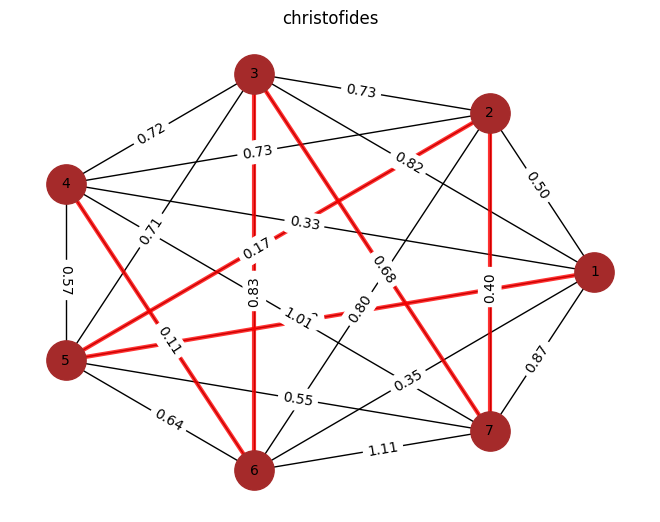

In [ ]:
distances, _ = generate_tsp_instance(5, seed=42)
distance_approx, chemin_approx = tsp_christofides(distances)
print(f"Distance ≈ {distance_approx:.4f}")
print(f"Chemin : {chemin_approx}")
draw_graph(distances, "christofides",chemin_approx)

### 6.4 Calcule de complexité

#### Étape 1 : Construction du graphe complet
```python
for i in range(n):
    for j in range(i + 1, n):
        G.add_edge(i, j, weight=float(distances[i][j]))
```
- Complexité en Temps

    Nombre d'arêtes :
    $$ E = \frac{n(n - 1)}{2} = \frac{1}{2}(n^2-n)\sim O(n^2)$$
    la méthode `G.add_edge` a une complexité en O(1)

* **Complexité Totale** : $T_1 = O(n^2)$
- Complexité en Mémoire :

    Chaque arête est stockée avec deux références aux villes et un attribut weight
* **Espace Mémoire** : $M_1 = O(n^2)$

---

#### Étape 2 : Arbre couvrant de poids minimal

```python
mst = nx.minimum_spanning_tree(G)
```
- Complexité en Temps

  Nombre d'arêtes $m = O(n^2)$\
  Kruskal :
  - tri des arêtes : $O(m\log m) = O(n^2\log n^2) = O(n^2\log n)$
  - Union-find: $O(m\alpha(n))$ négligable devant le tri
* **Complexité Totale** : $T_2 = O(n^2\log n)$
- Complexité en Mémoire :

    Structure Union-Find + copie  partielle du graphe : $O(n+m) = O(n^2)$
    **Espace Mémoire** : $M_2 = O(n^2)$
  
---

#### Étape 3 : Extraction des sommets impairs

```python
odd_nodes = [v for v in mst.nodes if mst.degree(v) % 2 == 1]
```
- Complexité en Temps
* Chaque calcul de `mst.degree(v)` est ( O(deg(v)) ), mais la somme des degrés vaut ( 2(n-1) ) (car un arbre a ( n-1 ) arêtes).
* **Complexité Totale** :$T_3 = O(n)$
  (très faible comparé au reste).

---

#### Étape 4 : Appariement parfait minimal sur les sommets impairs

```python
matching = nx.algorithms.matching.min_weight_matching(subgraph)
```
Détails :

* Soit ( $k = |odd\_nodes|$) (toujours pair, ≤ n)
* Graphe complet sur ces ( $k$ ) sommets $\Rightarrow$ ( $O(k^2)$ ) arêtes.
* L’algorithme utilisé par NetworkX est une implémentation du Blossom (Edmonds).

  * Version complexe : Blossom V (ou “blossom algorithm” classique)
  * Temps théorique : ( $O(k^3)$ )
  * Espace : ( $O(k^2)$ )

Dans le pire cas :

( $k \approx n$ ), donc : $T_4 = O(n^3),\;\; \quad M_4 = O(n^2)$

Remarque :

C’est le goulot d’étranglement principal de l’algorithme de Christofides.

---

#### Étape 5 : Construction du multigraphe eulérien

```python
M = nx.MultiGraph(mst)
for u, v in matching:
    M.add_edge(u, v, weight=G[u][v]["weight"])
```
Complexité en Temps :
    
* Ajout d’environ $\frac{k}{2} \le \frac{n}{2}$ arêtes : $O(n)$
* Opérations `add_edge` : $O(1)$ chacune
* **Complexité Totale** : $T_5 = O(n)$

#### Étape 6 : Circuit eulérien

```python
tour = list(nx.eulerian_circuit(M))
```

Détails :

* Un circuit eulérien passe une fois par chaque arête.
* Le graphe contient ( $O(n)$ ) arêtes ($\approx ( n - 1 + \frac{k}{2} )$).

Complexité :

* Chaque arête est visitée une fois $\Rightarrow ( O(|E_M|) = O(n) )$

---

#### Étape 7 : Conversion en tournée hamiltonienne (“shortcuts”)

```python
order = [tour[0][0]] + [v for _, v in tour]
order = list(dict.fromkeys(order))
```

Détails :

* Parcours linéaire  $\rightarrow ( O(n) )$.

---

#### Étape 8 : Calcul du coût total

```python
total = sum(distances[order[i], order[i+1]] for i in range(len(order)-1))
```

Détails :

* $(n)$ additions et accès en $(O(1)) \rightarrow (O(n))$.

#### Synthèse

| Étape | Complexité temps | Complexité mémoire |
| :---: | :--------------- | :----------------- |
| 1     | O(n²)            | O(n²)              |
| 2     | O(n² log n)      | O(n²)              |
| 3     | O(n)             | O(n)               |
| 4     | O(n³)            | O(n²)              |
| 5     | O(n)             | O(n)               |
| 6     | O(n)             | O(n)               |
| 7     | O(n)             | O(n)               |

- Complexité temps
$$
T(n) = O(n^3)
$$
- complexité mémoire
$$
M(n)=O(n^2)
$$

___
___

### 7. Résolution du TSP avec algorithmes de recherche locale

#### 7.1 Principe des algorithmes

Les algorithmes de recherche locale cherchent à améliorer une solution initiale en explorant son voisinage (i.e. l’ensemble des solutions pouvant être obtenues par de petites modifications de la solution courante).
L’objectif est de réduire progressivement la distance totale du cycle jusqu’à atteindre un optimum local (i.e. une solution qui ne peut plus être améliorée par le voisinage choisi).

Le schéma général est le suivant :

1. Partir d’une solution initiale $S$.
2. Générer les solutions voisines de $S$ selon un opérateur donné.
3. Si une solution voisine $S'$ est meilleure, remplacer $S \leftarrow S'$ et recommencer.
4. Arrêter lorsque plus aucune amélioration n’est possible ou après un nombre maximal d’itérations.

---

### 7.2 Opérateurs de voisinage k-opt

Les opérateurs **k-opt** consistent à supprimer $k$ arêtes dans le cycle et à reconnecter les segments autrement pour obtenir un nouveau cycle.
Ces mouvements permettent d’explorer efficacement l’espace des solutions.

* **2-opt** :
  On retire deux arêtes $(i,j)$ et $(k,l)$ puis on reconnecte les sommets en inversant la sous-chaîne intermédiaire, créant ainsi un nouveau cycle.
  Cet opérateur est simple et très efficace pour éliminer les croisements dans le cycle, améliorant souvent rapidement la solution.

* **3-opt** :
  Extension du 2-opt où trois arêtes sont supprimées et reconnectées de façon optimale parmi plusieurs configurations possibles.
  Il explore un voisinage plus large et peut trouver de meilleures améliorations, au prix d’un coût de calcul plus élevé.

> Remarque : les opérateurs k-opt garantissent le maintien d’un cycle hamiltonien valide.

---

### 7.3 Cercuit simulé

Le cercuit simulé (*Simulated Annealing*) est une méta-heuristique stochastique inspirée du processus de refroidissement des métaux en physique.
Contrairement à la recherche locale classique, il accepte parfois des solutions moins bonnes afin d’éviter de rester bloqué dans un optimum local.

Principe :

1. Initialiser une solution $S$ et une température $T$ élevée.
2. Générer une solution voisine $S'$ (souvent via 2-opt).
3. Si $S'$ est meilleure, on l’accepte.
   Sinon, on l’accepte avec une probabilité $p = \exp(-\frac{\Delta}{T})$, où $\Delta$ est la perte de qualité.
4. Diminuer progressivement la température $T$ selon un plan de refroidissement.
5. Répéter jusqu’à ce que $T$ devienne très faible.

Le recuit simulé équilibre exploration globale et exploitation locale, et donne souvent de très bons résultats pratiques pour le TSP.

---

### 7.4 Exemple d’utilisation du code

```python
# Solution initiale : résultat de Christofides
distances, coords = generate_tsp_instance(80, seed=42)
_, chemin_init = tsp_christofides(distances)

# Amélioration par recherche locale
chemin_2opt, dist_2opt = local_search_2opt(chemin_init, distances)
chemin_sa, dist_sa = simulated_annealing(chemin_init, distances)

print(f"Distance 2-opt : {dist_2opt:.2f}")
print(f"Distance recuit simulé : {dist_sa:.2f}")
```

> Remarques :
>
> * Les opérateurs de voisinage (2-opt, 3-opt) sont souvent utilisés comme sous-routines dans des méta-heuristiques comme le recuit simulé ou les algorithmes génétiques.
> * Ces méthodes offrent un bon compromis entre qualité de solution et temps de calcul.


In [ ]:
def two_opt_swap(tour: List[int], i: int, k: int) -> List[int]:
    """
    Applique un mouvement 2-opt : inverse le sous-chemin entre les indices i et k.
    Exemple: tour = [0,1,2,3,4,5], i=1, k=4 → [0,4,3,2,1,5]

    Args:
        tour : chemin actuel.
        i : indice de début du segment à inverser.
        k : indice de fin du segment à inverser.

    Returns:
        Nouveau cheminaprès inversion du segment.
    """
    return tour[:i] + list(reversed(tour[i:k+1])) + tour[k+1:]

In [ ]:
def local_search_2opt(tour: List[int], D: np.ndarray, max_passes: int = 100) -> Tuple[List[int], float]:
    """
    Recherche locale utilisant l'heuristique 2-opt pour le problème du voyageur de commerce (TSP).

    À partir d'un chemin initial, la fonction cherche à réduire la longueur totale
    en inversant des segments de la tournée (mouvements 2-opt), jusqu’à atteindre
    un optimum local ou un nombre maximal de passes.

    Args:
        tour : chemin initial.
        D : matrice des distances entre les villes.
        max_passes : nombre maximum d’itérations globales autorisées.

    Returns:
        (meilleur chemin trouvé, longueur correspondante)
    """
    n = len(tour)
    best = tour[:]
    best_len = tour_length(D, best)

    for _ in range(max_passes):
        improved = False
        # Parcourt toutes les paires d’arêtes (a,b) et (c,d)
        for i in range(n - 1):
            a, b = best[i], best[(i+1) % n]
            for k in range(i + 2, n - (i == 0)):  # évite de couper l'arête (dernier,0)
                c, d = best[k], best[(k+1) % n]
                # gain potentiel si on remplace (a,b) et (c,d) par (a,c) et (b,d)
                delta = (D[a, c] + D[b, d]) - (D[a, b] + D[c, d])
                # si la nouvelle configuration améliore le chemin
                if delta < -1e-12:
                    best = two_opt_swap(best, i + 1, k)   # inversion du segment
                    best_len += delta     # Mise à jour de la longueur du chemin
                    improved = True
                    break
            if improved:
                break      # ne pas faire une nouvelle boucle avec un chemin améliorée
        if not improved:   # Pas d'amélioration ==> Optimum locla atteint
            break
    return best, best_len

In [ ]:
def _apply_reconnect(tour: List[int], i: int, j: int, k: int, code: int) -> List[int]:
    """
    Reconstruit le tour pour l'un des 7 schémas (A|B|C|D), avec A=tour[:i+1], B=tour[i+1:j+1], C=tour[j+1:k+1], D=tour[k+1:].
    On ne l'appelle qu'une fois par passe (pour le meilleur code).
    """
    A = tour[:i+1]
    B = tour[i+1:j+1]
    C = tour[j+1:k+1]
    D = tour[k+1:]

    if code == 0:   # A + B^R + C + D  (2-opt sur (i,i+1)-(j,j+1))
        return A + B[::-1] + C + D
    if code == 1:   # A + B + C^R + D  (2-opt sur (j,j+1)-(k,k+1))
        return A + B + C[::-1] + D
    if code == 2:   # A + B^R + C^R + D
        return A + B[::-1] + C[::-1] + D
    if code == 3:   # A + C + B + D    (swap B,C)
        return A + C + B + D
    if code == 4:   # A + C^R + B + D
        return A + C[::-1] + B + D
    if code == 5:   # A + C + B^R + D
        return A + C + B[::-1] + D
    if code == 6:   # A + C^R + B^R + D
        return A + C[::-1] + B[::-1] + D
    return tour

def _delta_for_code(D: np.ndarray, tour: List[int], i: int, j: int, k: int, code: int) -> float:
    """
    Calcule Δ = coût_nouveau - coût_ancien en O(1) pour un code donné.
    Notation :
      arêtes coupées : (a,a1), (b,b1), (c,c1) avec
        a = tour[i],     a1 = tour[(i+1)%n]
        b = tour[j],     b1 = tour[(j+1)%n]
        c = tour[k],     c1 = tour[(k+1)%n]
    Les arêtes ajoutées dépendent du schéma de reconnexion.
    """
    n = len(tour)
    a  = tour[i]
    a1 = tour[(i+1) % n]
    b  = tour[j]
    b1 = tour[(j+1) % n]
    c  = tour[k]
    c1 = tour[(k+1) % n]

    removed = D[a, a1] + D[b, b1] + D[c, c1]

    # Table des arêtes ajoutées (3 nouvelles arêtes) pour chaque code
    if code == 0:
        # A + B^R + C + D  -> add (a,b), (a1,b1), (c,c1)
        added = D[a, b] + D[a1, b1] + D[c, c1]
    elif code == 1:
        # A + B + C^R + D  -> add (a,a1), (b,c), (b1,c1)
        added = D[a, a1] + D[b, c] + D[b1, c1]
    elif code == 2:
        # A + B^R + C^R + D -> add (a,b), (a1,c), (b1,c1)
        added = D[a, b] + D[a1, c] + D[b1, c1]
    elif code == 3:
        # A + C + B + D    -> add (a,b1), (c,a1), (b,c1)
        added = D[a, b1] + D[c, a1] + D[b, c1]
    elif code == 4:
        # A + C^R + B + D  -> add (a,c), (b1,a1), (b,c1)
        added = D[a, c] + D[b1, a1] + D[b, c1]
    elif code == 5:
        # A + C + B^R + D  -> add (a,b1), (c,b), (a1,c1)
        added = D[a, b1] + D[c, b] + D[a1, c1]
    elif code == 6:
        # A + C^R + B^R + D -> add (a,c), (b1,b), (a1,c1)
        added = D[a, c] + D[b1, b] + D[a1, c1]
    else:
        return 0.0

    return float(added - removed)

In [ ]:
def local_search_3opt(tour: List[int], D: np.ndarray, max_passes: int = 20) -> Tuple[List[int], float]:
    """
    3-opt avec calcul de Δ en O(1) et reconstruction unique par passe.
    - Boucles sur i<j<k avec j>=i+2, k>=j+2 (évite segments B et C vides).
    - Évalue 7 schémas de reconnexion, garde le meilleur Δ.
    - Applique au plus un move par passe (best-improvement)

    Complexité par passe : Θ(n^3) (contre Θ(n^4) en version naïve).
    Mémoire : O(n).
    """
    n = len(tour)
    best = tour[:]
    best_len = tour_length(D, best)

    for _ in range(max_passes):
        improved = False
        best_delta = 0.0
        best_tuple = None  # (i, j, k, code)

        for i in range(n):
            a1_idx = (i + 1) % n
            for j in range(i + 2, n):        # j >= i+2
                b1_idx = (j + 1) % n
                if j == a1_idx:               # garde-fou (inutile ici mais explicite)
                    continue
                for k in range(j + 2, n):     # k >= j+2
                    if k == b1_idx:
                        continue

                    # Évaluer les 7 codes avec Δ en O(1)
                    # (option : petit pruning possible si on veut)
                    local_best_code = None
                    local_best_delta = 0.0

                    # On peut dérouler la boucle pour micro-gagner, mais gardons-la claire
                    for code in range(7):
                        delta = _delta_for_code(D, best, i, j, k, code)
                        if delta < local_best_delta - 1e-12:  # amélioration
                            local_best_delta = delta
                            local_best_code = code

                    if local_best_code is not None:
                        # Best-improvement : mémoriser si meilleur jusqu'ici
                        if local_best_delta < best_delta - 1e-12:
                            best_delta = local_best_delta
                            best_tuple = (i, j, k, local_best_code)


        if best_tuple is not None:
            i, j, k, code = best_tuple
            best = _apply_reconnect(best, i, j, k, code)
            best_len += best_delta
            improved = True

        if not improved:
            break

    return best, best_len

In [ ]:
def simulated_annealing( tour: List[int], D: np.ndarray, T0: Optional[float] = None, Tmin: float = 1e-4, cooling: float = 0.995, iters_per_T: int = 200, max_steps: Optional[int] = None, rng: Optional[random.Random] = None) -> Tuple[List[int], float]:
    rng = rng or random.Random()
    n = len(tour)
    current = tour[:]
    cur_len = tour_length(D, current)
    best, best_len = current[:], cur_len

    # T0 heuristique si non fourni
    T = (0.1 * D.mean() * n) if T0 is None else float(T0)
    steps = 0

    while T > Tmin:
        for _ in range(iters_per_T):
            if max_steps is not None and steps >= max_steps:
                return best, best_len
            steps += 1

            i = rng.randrange(0, n - 1)
            k = rng.randrange(i + 1, n)
            a, b = current[i], current[(i+1) % n]
            c, d = current[k], current[(k+1) % n]
            delta = (D[a, c] + D[b, d]) - (D[a, b] + D[c, d])

            if delta < 0 or rng.random() < math.exp(-delta / max(T, 1e-12)):
                current = two_opt_swap(current, i + 1, k)
                cur_len += delta
                if cur_len < best_len - 1e-12:
                    best, best_len = current[:], cur_len
        T *= cooling
    return best, best_len

[Init]  Christofides : 4.80
[2-opt] Longueur     : 4.16  (gain 0.64)
[3-opt] Longueur     : 4.16  (gain 0.64)
[SA]    Longueur     : 4.07  (gain 0.73)


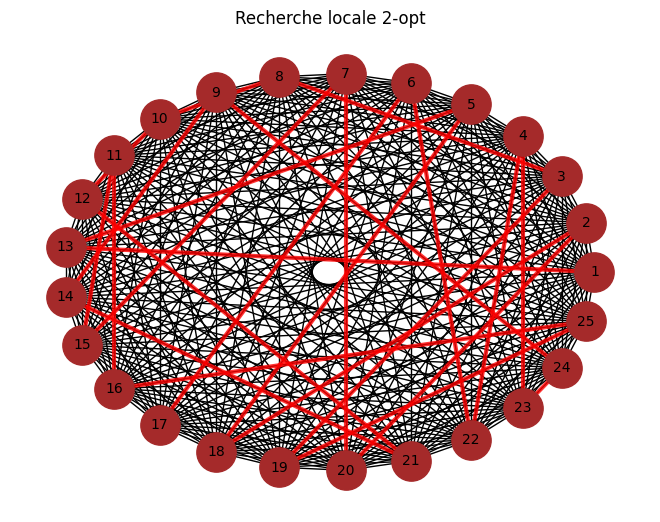

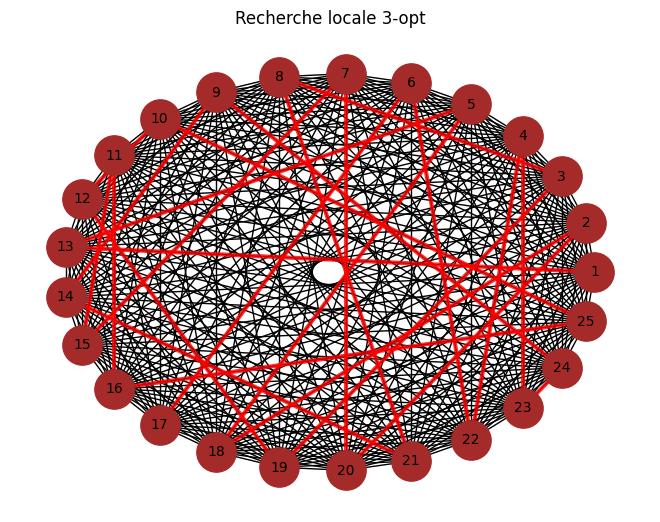

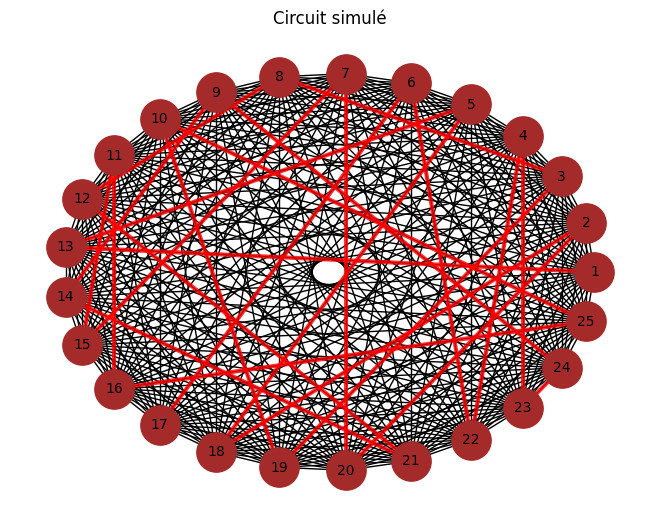

In [ ]:
distances, _ = generate_tsp_instance(25, seed=42)
dist, tour_init  = tsp_christofides(distances)

dist_init = tour_length(distances, tour_init)
print(f"[Init]  Christofides : {dist_init:.2f}")

tour_2, dist_2 = local_search_2opt(tour_init, distances)
print(f"[2-opt] Longueur     : {dist_2:.2f}  (gain {dist_init - dist_2:.2f})")

tour_3, dist_3 = local_search_3opt(tour_init, distances)
print(f"[3-opt] Longueur     : {dist_3:.2f}  (gain {dist_init - dist_3:.2f})")

tour_sa, dist_sa = simulated_annealing(tour_2, distances)
print(f"[SA]    Longueur     : {dist_sa:.2f}  (gain {dist_init - dist_sa:.2f})")


draw_graph(distances, "Recherche locale 2-opt",tour_2, False)
draw_graph(distances, "Recherche locale 3-opt",tour_3, False)
draw_graph(distances, "Circuit simulé",tour_sa, False)

### 7.5 Calcule de complexité

#### 7.5.1 Complexité de la recherche locale 2-opt (first improvement)

- **1. complexité de `tour_lenght(D, tour)`**

  ```python
  def tour_length(D: np.ndarray, tour: List[int]) -> float:
    idx = np.asarray(tour)
    return float(D[idx, np.roll(idx, -1)].sum())
  ```

  - Complexité temps:

    - Conversion de `tour` en tableau numpy $\rightarrow O(n)$
    - Décalage circulaire avec `np.roll` $\rightarrow O(n)$
    - Accès à `D[idx, np.roll(idx, -1)]` et somme $\rightarrow O(n)$

  $\Rightarrow$ Temps Total : $T(n) = O(n)$ $\Rightarrow$ fonction linéaire sur le nombre de villes

  - Complexité mémoire :

    - Création de deux tableaux temporaires (`idx` et le résultat de `np.roll`) $\rightarrow O(n)$

    $\Rightarrow$ Mémoire totale : $M(n) = O(n)$

___

- **2. complexité de `two_opt_swap(tour, i, k)`**

  ```python
  def two_opt_swap(tour: List[int], i: int, k: int) -> List[int]:
      return tour[:i] + list(reversed(tour[i:k+1])) + tour[k+1:]
  ```

  - Complexité temps:

    - `tour[:i]` $\rightarrow$ copie des i premiers éléments $\rightarrow$ (O(i))
    - `reversed(tour[i:k+1])` $\rightarrow$ inverse une sous-liste de longueur (k - i + 1) $\rightarrow$ (O(k - i + 1))
    - `tour[k+1:]` $\rightarrow$ copie du reste $\rightarrow$ (O(n - k - 1))

  $\Rightarrow$ Temps Total :

  $$
  T(n) = O(i) + O(k-i+1) + O(n - k - 1) = O(n)
  $$

  - Complexité mémoire :

    - On crée une nouvelle liste de taille n $\rightarrow$ (O(n))

  $\Rightarrow$ Mémoire totale : $M(n) = O(n)$

___

- **3. Complexité de `local_search_2opt(tour, D, max_passes)`**

  1.  **Initialisation**
      - Copie de tour : $O(n)$
      - calcul de `best_len`avec `tour_lenght` : O(n)
        $\Rightarrow$ Complexité en $O(n)$ en temps et en mémoire
  2.  **Structure d'une passe**

      ```python
      for i in range(n - 1):
          a, b = best[i], best[(i+1) % n]
          for k in range(i + 2, n - (i == 0)):
              c, d = best[k], best[(k+1) % n]
              delta = (D[a, c] + D[b, d]) - (D[a, b] + D[c, d])
              if delta < -1e-12:
                  best = two_opt_swap(best, i + 1, k)  # O(n)
                  ...
                  break
          if improved:
              break
      ```
      
      2.1. **Nombre exact de paires (i,k) testées par passe (sans amélioration)**

      - Pour (i=0), $(k \in {2,...,n-2}) \Rightarrow\;(n-3)$ valeurs.
      - Pour $(i=1,...,n-2), (k \in {i+2,...,n-1}) \Rightarrow\; (n-i-2)$ valeurs.
      - somme totale :
        $$
           (n-3) + \sum_{i=1}^{n-2} (n - i - 2)
            = (n-3) + \sum_{j=0}^{n-3} j
            = (n-3) + \frac{(n-3)(n-2)}{2}
            = \frac{n(n-3)}{2}
          $$

          $\Rightarrow$ donc complexité temps en $O(n^2)$

      2.2. **Complexité d’un test (calcul de $\Delta$)**

      - 4 accès à `D` + opérations arithmétiques constantes $\rightarrow/; O(1)$.

      2.3. **Complexité d'un swap**

      - `two_opt_swap(best, i+1, k)` déjà calculé $\rightarrow\; (O(n))$.
      - Mise à jour de `best_len` par addition de `delta` $\rightarrow\; O(1)$.
        Point clé : stratégie first-improvement $\rightarrow$ au plus un swap par passe, et on quitte les boucles dès la 1ère amélioration.

___

  3.  **Coût d'une passe**

      3.1. **Aucune amélioration trouvée (pire cas)**

      - On évalue tous les $\frac{n(n-3)}{2}$ candidats
      - Temps par passe :$O(n^2)$.
      - Espace additionelle: $O(1)$

      3.2. **Cas avec amélioration (first-imporvemnt)**

      - On vérifie $q$ candidats jusqu’au premier améliorant, donc $O(q)$ tests.
      - Puis un swap $\rightarrow O(n)$.

      Temps par passe : $O(q) + O(n)$.

      - Si l’amélioration arrive tôt (petit $q$) $\rightarrow$ la passe est en $(O(n))$.
      - Si l’amélioration arrive tard (grand $q$) $\rightarrow$ la passe est en $O(n^2)$.

___

  4.  **Nombre de passes et cout total**

      Soit $P$, le nombre de passes effectuées avant d'atteindre l'optimum local.

      $$
         0 \leq P \leq \text{max\_passes}
      $$

      4.1. **Pire cas théorique**
      
      Chaque passe peut coûter $\Theta(n^2)$ (si pas d’amélioration) ou $\Theta(n^2) + O(n)$ (Amélioration tardive + un swap).
      
      Donc temps total :
      $$
      T(n) = O(P \cdot n^2) + O(n)
      $$
      ($+O(n)$ pour l'initailisation)

      - Avec `max_passes` ($P\leq \text{max\_passes}$) :
      $$
      T(n) = O(\text{max\_passes} \cdot n^2)
      $$

      Mémoire totale :

      - `best`est une liste de taille $n$ $\rightarrow O(n)$
      - variable temporaires $\rightarrow O(1)$
      $$
      M(n) = O(n)
      $$

___

  5.  **Synthèse**

| Étape | Complexité en Temps               | Complexité en Mémoire |
| :---: | :-------------------------------- | :-------------------- |
| 1     | $O(n)$                            | $O(n)$                |
| 2.1   | $O(n^2)$                          | $O(1)$                |
| 2.2   | $O(1)$                            | $O(1)$                |
| 2.3   | $O(n)$                            | $O(n)$                |
| 3.1   | $O(n^2)$                          | $O(1)$                |
| 3.2   | $O(q + n)$, avec $(q \le n^2)$    | $O(n)$                |
| 4     | $O(\text{max\_passes} \cdot n^2)$ | $O(n)$                |

- Complexité temps
$$
T(n) = O(\text{max\_passes} \cdot n^2)
$$
- complexité mémoire
$$
M(n)=O(n)
$$
___
___

#### 7.5.2 Complexité de la recherche locale 3-opt

1. **complexité de `_delta_for_code(D, tour, i, j, k, code)`**

    ```python
    def _delta_for_code(D, tour, i, j, k, code):
        ...
        return float(added - removed)
    ```
    
    - Complexité temps :

      - Accès à 6 éléments du tableau `tour` $\rightarrow O(1)$
      - Accès à 6 cases de la matrice `D` $\rightarrow O(1)$
      - 6 additions et 1 soustraction $\rightarrow O(1)$

      Temps total : $T(n) = O(1) \Rightarrow$ le calcul de delta est constant
      
    - Complexité mémoire :

      $$
      \rightarrow M(n) = O(1)
      $$

___

2. **complexité de `_apply_reconnect(tour, i, j, k, code)`**

    ```python
       def _apply_reconnect(tour, i, j, k, code):
        A = tour[:i+1]
        B = tour[i+1:j+1]
        C = tour[j+1:k+1]
        D = tour[k+1:]
        ...
        return A + B[::-1] + C + D
    ```
    
    - Complexité temps :

      - Découpage en quatre segments $\rightarrow 4\times O(n) = O(n)$
      - inversion de segments  $\rightarrow O(n)$
      - Concaténation finale  $\rightarrow O(n)$

      Temps total : $T(n) = O(1) \Rightarrow$ le calcul de delta est constant
      
    - Complexité mémoire :

      - Création d’une nouvelle liste de taille $n$ $\rightarrow O(n)$
      - Variables temporaires (A, B, C, D) de taille cumulée $n$  $\rightarrow O(n)$

      Mémoire total :

      $$
      M(n) = O(n)
      $$

___

3. **complexité de `local_search_3opt(tour, D, max_passes)`**

   3.1 **Initialisation**

     ```python
    best = tour[:]
    best_len = tour_length(D, best)
    ```
    - Copie de `tour` $\rightarrow O(n)$
    - Calcul de `tour_length` $\rightarrow O(n)$
  $$
  \Rightarrow T(n) = O(n), \quad M(n) = O(n)
  $$

    3.2 **Structure d’une passe**

    ```python
    for i in range(n):
        for j in range(i + 2, n):
            for k in range(j + 2, n):
                for code in range(7):
                    delta = _delta_for_code(...)
                    ...
    ```

   3.2.1 **Nombre de triples (i, j, k)**

   - contraintes : $i < j < k$, avec ($j \ge i+2$) et ($k \ge j+2$)
   - Nombre exact de combinaisons possibles :

    $$
    \text{Nb\_triples} = \binom{n-2}{3}
    = \frac{(n-2)(n-3)(n-4)}{6}
    = O(n^3)
    $$

   3.2.2 **Complexité d’un test**

   - 7 appels à `_delta_for_code` $\rightarrow 7 \times O(1) = O(1)$
   - Comparaisons et affectations $\rightarrow O(1)$

   $$
   T(n) = O(1)
   $$

   3.2.3 **Coût d’une passe**

   - Complexité en temps :
   
       - Tous les triples testés $\rightarrow O(n^3)$
       - Application du meilleur movement $\rightarrow O(n)$

      $$
          T(n) = O(n^3)
      $$
    
    - Complexité en mémoire:
  
       - `best` $\rightarrow O(n)$
       - Variables temporaires $\rightarrow O(1)$
       - Tour lors de l'application $\rightarrow O(n)$

     $$
     M(n) = O(n)
     $$

   3.3 **Nombre de passes**

   Soit $P$, le nombre de passes effectuées avant d'atteindre l'optimum local.

      $$
         0 \leq P \leq \text{max\_passes}
      $$

   3.4 **Coût total**
   - Complexité en temps :
  
     $$
        T(n) = O(P \cdot n^3) + O(n)
     $$
     $$
     \Rightarrow T(n) = O(\text{max\_passes} \cdot n^3)
     $$
   - Complexité en mémoire :

     $$
     M(n) = O(n)
     $$
   
___
      


  4.  **Synthèse**

| Étape                            |         Complexité Temps         | Complexité Mémoire |
| :------------------------------- | :------------------------------- | :----------------  |
| `_delta_for_code`                | $O(1)$                           |$O(1)$              |
| `_apply_reconnect`               | $O(n)$                           |$O(n)$              |
| Une passe de `local_search_3opt` | $O(n^3)$                         |$O(n)$              |
| Algorithme complet               | $O(\text{max\_passes} \cdot n^3)$|$O(n)$              |

- Complexité temps
$$
T(n) = O(\text{max\_passes} \cdot n^3)
$$
- complexité mémoire
$$
M(n)=O(n)
$$
___
___

#### 7.5.3 Complexité de la recherche locale par circuit simulé

1. **Initialisation**
    
    ```python
    rng = rng or random.Random()        # O(1)
    n = len(tour)                        # O(1)
    current = tour[:]                    # O(n)
    cur_len = tour_length(D, current)    # O(n)
    best, best_len = current[:], cur_len # O(n)
    
    T = (0.1 * D.mean() * n) if T0 is None else float(T0)
    steps = 0
    ```
    - Complexité en temps :
      - Copies de liste $\rightarrow O(n)$
      - `tour_length` $\rightarrow O(n)$
      - Si `T0 is None` : `D.mean()` parcourt une matrice $n \times n$ $\rightarrow O(n^2)$ \
        Sinon, calcul direct de T $\rightarrow O(1)$

       Temps total :
      $$
      T(n)=
      \begin{cases}
      O(n^2) \text{ si } T0 \text{ non fourni}\\  
      O(n)   \text{ si } T0 \text{ fourni}
      \end{cases}
      $$
  

    - Complexité en mémoire :
      - `current` et `best` sont 2 listes de taille $n \rightarrow O(n)$
      - Variables scalaires $\rightarrow O(1)$
     
      $$
      M(n) = O(n)
      $$

___

2. **Structure d’un palier de température (boucle interne)**
    
    ```python
    for _ in range(iters_per_T):
        if max_steps is not None and steps >= max_steps: ...
        steps += 1
    
        i = rng.randrange(0, n - 1)         # O(1)
        k = rng.randrange(i + 1, n)         # O(1)
    
        a, b = current[i], current[(i+1)%n] # O(1)
        c, d = current[k], current[(k+1)%n] # O(1)
    
        delta = (D[a, c] + D[b, d]) - (D[a, b] + D[c, d]) # O(1)
    
        if delta < 0 or rng.random() < exp(-delta / max(T, 1e-12)):
            current = two_opt_swap(current, i + 1, k)     # O(n) temps, O(n) mémoire
            cur_len += delta                              # O(1)
            if cur_len < best_len - 1e-12:
                best, best_len = current[:], cur_len      # copie O(n)
    ```
    2.1. **Coût d’une itération  (sans acceptation)**

      - Tirages aléatoires + accès liste/matrice + calcul de `delta` + test d’acceptation  $\rightarrow O(1)$ en temps et mémoire


   2.2. **Coût d’un mouvement accepté**
    
    - Complexité en temps :
      - `two_opt_swap(current, i+1, k)` crée un **nouveau tour** $\rightarrow O(n)$ en temps et mémoire
      - Mise à jour de `best` en cas de solution améliorée  $\rightarrow O(n)$

   Complexité :
  $$
  T(n)= O(n), \quad M(n) = O(n)
  $$

___

3. **Nombre de paliers de température (boucle externe)**

   La température suit $\;T_{n} = T_{n-1} \cdot \text{cooling}\;$ jusqu'à $T_n \leq \text{Tmin}$. Si $\text{cooling} \in [0,1]$ et $T_0 > \text{Tmin}$

   Le nombre de paliers est alors :
   $$
        L =\Big\lceil \frac{\ln(\text{Tmin}/T_0)}{\ln(\text{cooling})} \Big\rceil
   $$

   > **Remarque :** si `max_steps` est fourni, le nombre effectif d’itérations est borné par `max_steps`, ce qui peut arrêter avant d’atteindre $T \leq \text{Tmin}$.

___

4. **Coût d’un palier de température**

   - Complexité en Temps
       - Sans tenir compte des acceptations $\rightarrow \text{iters\_per\_T} \times O(1) = O(\text{iters\_per\_T})$
       - En tenant compte des acceptations : si on note $\alpha_T \in [0,1]$ le taux d’acceptation au palier $T$, le coût est
         $$
         T(n) = O(\text{iters\_per\_T}) + O(\alpha_T \cdot \text{iters\_per\_T} \cdot n)
         $$
       - Pire cas (acceptation systématique, $\alpha_T = 1$)
         $\Rightarrow T(n) = O(\text{iters\_per\_T} \cdot n)$
   
   - Complexité en mémoire : $M(n) = O(n)$ (liste `current` et nouvelle liste lors du `two_opt_swap`)

___

5. **Coût total **

   - Complexité en Temps
       - Pire cas (acceptation haute à tous les paliers) :
         $$    
         T(n) = T_{init}(n) + O(L \cdot \text{iters\_per\_T} \cdot n)
         $$
   
   - Complexité en mémoire : $M(n) = O(n)$
  
___

6. **Synthèse**

## Bibliographie :

- CONTRIBUTEURS AUX PROJETS WIKIMEDIA, 2023. Algorithme de Christofides. \[en ligne]. 30 janvier 2023. Disponible à l’adresse : https://fr.wikipedia.org/wiki/Algorithme_de_Christofides (consulté le 14/10/2025)
- CONTRIBUTEURS AUX PROJETS WIKIMEDIA, 2025. Recherche locale (optimisation). \[en ligne]. 10 juillet 2025. Disponible à l’adresse : https://fr.wikipedia.org/wiki/Recherche_locale_(optimisation) (consulté le 16/10/2025)
- CONTRIBUTEURS AUX PROJETS WIKIMEDIA, 2025b. 2-opt. \[en ligne]. 3 septembre 2025. Disponible à l’adresse : https://fr.wikipedia.org/wiki/2-opt (consulté le 16/10/2025)